# Setup

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
!pip install -r /content/drive/MyDrive/RAG-LangChain/requirements.txt --quiet

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.0 MB/s eta 0:00:00
Reason for being yanked: The Windows wheels, under some conditions, caused segfaults in unrelated user code.  Due to this we deleted the Windows wheels to prevent these segfaults, however this caused greater disruption as pip then began to try (and fail) to build 3.9.1 from the sdist on Windows which impacted far more users.  Yanking the whole release is the only tool available to eliminate these failures without changes to on the user side.  The sdist, OSX wheel, and manylinux wheels are all functional and there are no critical bugs in the release.   Downstream packagers shoul

In [9]:
import os
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_openai import OpenAIEmbeddings
from numpy import dot, array
from numpy.linalg   import norm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import yaml

In [11]:
with open('/content/drive/MyDrive/RAG-LangChain/config.yaml', 'r') as config_file:
    config = yaml.safe_load(config_file)
os.environ['OPENAI_API_KEY'] = config['OPENAI_API_KEY']

# Embedding

In [12]:
documents = [
    "Este é o primeiro exemplo da semana acadêmica. Ele nos ajuda a aprender sobre base de dados vetorial",
    "Este é o segundo exemplo da semana acadêmica. Ele nos ajuda a aprender sobre base de dados vetorial",
    "O segundo exemplo oferece uma visão geral sobre base de dados vetorial"
]

In [13]:
# Dividir documentos em chunks
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=50,
    chunk_overlap=10,
    length_function=len
)
chunks = text_splitter.create_documents(documents)

print("\nChunks gerados:")
for i, chunk in enumerate(chunks):
    print(f"Chunk {i+1}: {chunk.page_content}")


Chunks gerados:
Chunk 1: Este é o primeiro exemplo da semana acadêmica. Ele
Chunk 2: Ele nos ajuda a aprender sobre base de dados
Chunk 3: de dados vetorial
Chunk 4: Este é o segundo exemplo da semana acadêmica. Ele
Chunk 5: Ele nos ajuda a aprender sobre base de dados
Chunk 6: de dados vetorial
Chunk 7: O segundo exemplo oferece uma visão geral sobre
Chunk 8: sobre base de dados vetorial


In [14]:
print(f"\nNúmero total de chunks: {len(chunks)}")


Número total de chunks: 8


In [15]:
embeddings = OpenAIEmbeddings(model='text-embedding-ada-002')
print(embeddings)

client=<openai.resources.embeddings.Embeddings object at 0x786f684c71f0> async_client=<openai.resources.embeddings.AsyncEmbeddings object at 0x786f5d023f70> model='text-embedding-ada-002' dimensions=None deployment='text-embedding-ada-002' openai_api_version='' openai_api_base=None openai_api_type='' openai_proxy='' embedding_ctx_length=8191 openai_api_key=SecretStr('**********') openai_organization=None allowed_special=None disallowed_special=None chunk_size=1000 max_retries=2 request_timeout=None headers=None tiktoken_enabled=True tiktoken_model_name=None show_progress_bar=False model_kwargs={} skip_empty=False default_headers=None default_query=None retry_min_seconds=4 retry_max_seconds=20 http_client=None http_async_client=None check_embedding_ctx_length=True


In [16]:
embedded_chunks = embeddings.embed_documents([chunk.page_content for chunk in chunks])

In [17]:
# Mostrar os embeddings gerados
print("\nEmbeddings gerados (mostrando apenas os primeiros 5 elementos de cada):")
for i, embed in enumerate(embedded_chunks):
    print(f"Embedding {i+1}: {embed[:5]}...")


Embeddings gerados (mostrando apenas os primeiros 5 elementos de cada):
Embedding 1: [-0.007149433717131615, 0.01432431023567915, 0.015647336840629578, -0.01432431023567915, -0.008898627944290638]...
Embedding 2: [-0.009254040196537971, 0.015388887375593185, 0.005031479988247156, -0.03137313947081566, -0.003104633651673794]...
Embedding 3: [-0.029514629393815994, 0.002472054911777377, 0.00416328152641654, -0.02853262796998024, -0.015657484531402588]...
Embedding 4: [-0.010814930312335491, 0.013056894764304161, 0.017680946737527847, -0.00775133678689599, -0.015222428366541862]...
Embedding 5: [-0.009254040196537971, 0.015388887375593185, 0.005031479988247156, -0.03137313947081566, -0.003104633651673794]...
Embedding 6: [-0.029514629393815994, 0.002472054911777377, 0.00416328152641654, -0.02853262796998024, -0.015657484531402588]...
Embedding 7: [-0.0008736582822166383, 0.0002918416867032647, 0.019806239753961563, -0.019500914961099625, 0.012345712631940842]...
Embedding 8: [-0.02914202

In [18]:
print(f"\nNúmero de elementos em cada embedding: {len(embedded_chunks[0])}")


Número de elementos em cada embedding: 1536


In [19]:
def cosine_similarity(vec1, vec2):
    return dot(vec1, vec2) / (norm(vec1) * norm(vec2))

In [20]:
print("\nSimilaridades entre todos os chunks:")
similarities = []
for i in range(len(embedded_chunks)):
    for j in range(i + 1, len(embedded_chunks)):
        similarity = cosine_similarity(embedded_chunks[i], embedded_chunks[j])
        similarities.append((i, j, similarity))
        similarity = min(1, max(0, similarity))
        print(f"Similaridade entre o chunk {i+1} e o chunk {j+1}: {similarity:.2f}")


Similaridades entre todos os chunks:
Similaridade entre o chunk 1 e o chunk 2: 0.80
Similaridade entre o chunk 1 e o chunk 3: 0.76
Similaridade entre o chunk 1 e o chunk 4: 0.96
Similaridade entre o chunk 1 e o chunk 5: 0.80
Similaridade entre o chunk 1 e o chunk 6: 0.76
Similaridade entre o chunk 1 e o chunk 7: 0.79
Similaridade entre o chunk 1 e o chunk 8: 0.73
Similaridade entre o chunk 2 e o chunk 3: 0.81
Similaridade entre o chunk 2 e o chunk 4: 0.80
Similaridade entre o chunk 2 e o chunk 5: 1.00
Similaridade entre o chunk 2 e o chunk 6: 0.81
Similaridade entre o chunk 2 e o chunk 7: 0.79
Similaridade entre o chunk 2 e o chunk 8: 0.86
Similaridade entre o chunk 3 e o chunk 4: 0.77
Similaridade entre o chunk 3 e o chunk 5: 0.81
Similaridade entre o chunk 3 e o chunk 6: 1.00
Similaridade entre o chunk 3 e o chunk 7: 0.78
Similaridade entre o chunk 3 e o chunk 8: 0.92
Similaridade entre o chunk 4 e o chunk 5: 0.80
Similaridade entre o chunk 4 e o chunk 6: 0.77
Similaridade entre o c

# Visualização

In [21]:
embedded_chunks_array = array(embedded_chunks)

In [22]:
tsne = TSNE(n_components=2, perplexity=2, max_iter=300)
tsne_result = tsne.fit_transform(embedded_chunks_array)

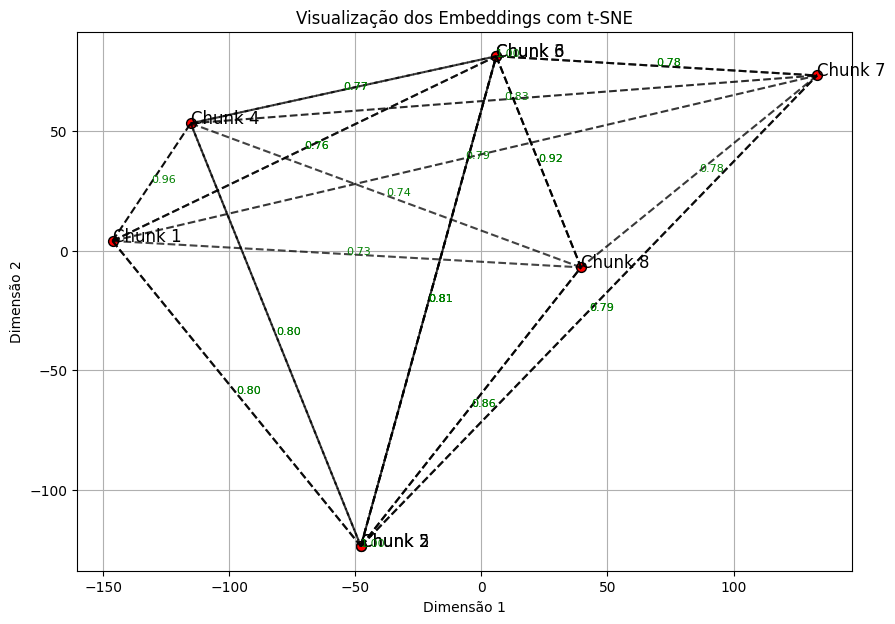

In [23]:
plt.figure(figsize=(10, 7))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c='red', edgecolor='k', s=50)
for i, chunk in enumerate(chunks):
    plt.text(tsne_result[i, 0], tsne_result[i, 1], f'Chunk {i+1}', fontsize=12)
for (i, j, similarity) in similarities:
    alpha_value = min(1, max(0, similarity))
    plt.plot([tsne_result[i, 0], tsne_result[j, 0]], [tsne_result[i, 1], tsne_result[j, 1]], 'k--', alpha=alpha_value)
    mid_x = (tsne_result[i, 0] + tsne_result[j, 0]) / 2
    mid_y = (tsne_result[i, 1] + tsne_result[j, 1]) / 2
    plt.text(mid_x, mid_y, f'{similarity:.2f}', fontsize=8, color='green')
plt.title('Visualização dos Embeddings com t-SNE')
plt.xlabel('Dimensão 1')
plt.ylabel('Dimensão 2')
plt.grid(True)
plt.show()